<a href="https://colab.research.google.com/github/SayanDas07/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gld_price_data.csv')
X = dataset.drop(['Date','GLD'],axis=1)
Y = dataset['GLD']

In [ ]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
dataset.isnull().sum()

In [9]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [13]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[127.11519861 116.75389919 139.64640069 121.84449996  94.16690037
 155.39120046 117.54780113 113.35050113 153.44089984 105.56870046
 103.22629882 120.27290084  92.02489943 159.13370062 121.44209864
 117.43930097  86.60659837  91.83999934  92.9420998  125.58319999
  83.81939914 117.61189833 126.15909843 172.60959729 168.24839714
 139.56230262 114.2682995  159.86910228 133.47620133 115.68370012
 110.98790099 104.68350184 128.26529987 122.0387      98.8036998
 120.18919953  85.07499988 114.99030011 127.32199864 140.42899853
 107.65770049 131.61690135 108.26699972 134.65220058 133.53169916
 149.28329945 119.62220064 156.90000052 156.80590136 127.58380013
 123.8733001  114.95029846 123.92690041 119.08869989 153.83670055
 121.4558995  112.25060008  86.88879954 155.34909997 117.88850108
  88.12159929 114.65729994  83.17699948 146.34709705 125.31440012
 127.35959831 125.1063993  121.05779968 167.91400151 121.59189905
 125.63030163 172.81839774 121.57550046 169.49820115 118.97590046
 127.333299

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, test_data_prediction)

0.9899648533756992

In [23]:
Y_test = list(y_test)

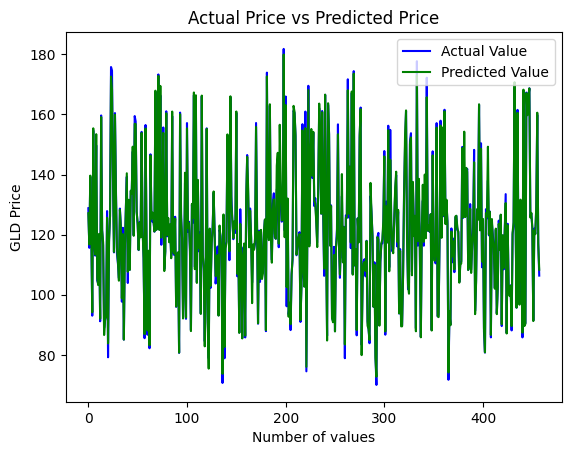

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()